In [1]:
import os
base_dir = '/content/drive/MyDrive/BOOTCAMP_DSG1/DEEP-LEARNING/datasets'

In [4]:
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')
test_dir = os.path.join(base_dir,'test')

# RUTA LA ENTRENAMIENTO DE PERROS Y GATOS

In [6]:
train_gatos_dir = os.path.join(train_dir,'gatos')
train_perros_dir = os.path.join(train_dir,'perros')

validation_gatos_dir = os.path.join(validation_dir,'gatos')
validation_perros_dir = os.path.join(validation_dir,'perros')

test_gatos_dir = os.path.join(test_dir,'gatos')
test_perros_dir = os.path.join(test_dir,'perros')


# MOSTRAMOS UNA IMAGEN DE NUESTRO DATASET

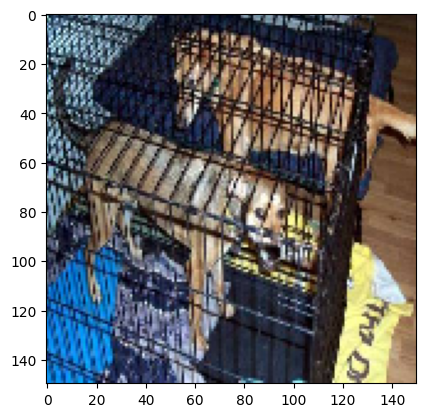

In [14]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

fnames = [os.path.join(train_perros_dir,fname) for fname in os.listdir(train_perros_dir)]

img_path = fnames[1]
img = image.load_img(img_path, target_size=(150,150))
x = image.img_to_array(img)

plt.figure()
imgplot = plt.imshow(image.array_to_img(x))
plt.show()

# PROCESAMIENTO DE IMAGENES

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data = ImageDataGenerator(rescale=1./255)
val_data = ImageDataGenerator(rescale=1./255)
test_data = ImageDataGenerator(rescale=1./255)

# CREAR DATASETS DE ENTRENAMIENTO VALIDACIÓN Y PRUEBAS CON ESCALAMIENTO

In [17]:
training_set = train_data.flow_from_directory(train_dir,
                                              target_size=(64,64),
                                              batch_size=20,
                                              class_mode='binary')

Found 2000 images belonging to 2 classes.


In [18]:
validation_set = val_data.flow_from_directory(
    validation_dir,
    target_size=(64,64),
    batch_size=20,
    class_mode='binary'
)

test_set = test_data.flow_from_directory(
    test_dir,
    target_size=(64,64),
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.
Found 2 images belonging to 2 classes.


# CREAMOS LA RED NEURONAL CONVOLUCIONAL

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

In [24]:
modelo = Sequential()
modelo.add(Conv2D(32,(3,3),activation='relu',input_shape=(64,64,3)))
modelo.add(MaxPooling2D((2,2)))
modelo.add(Conv2D(32,(3,3),activation='relu'))
modelo.add(MaxPooling2D((2,2)))
modelo.add(Flatten())
modelo.add(Dense(128,activation='relu'))
modelo.add(Dense(1,activation='sigmoid'))

modelo.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 29, 29, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         802,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 813,217 (3.10 MB)

 Trainable params: 813,217 (3.10 MB)

 Non-trainable params: 0 (0.00 B)

# COMPILAMOS Y ENTRENAMOS EL MODELO

In [25]:
modelo.compile(loss='binary_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

In [26]:
history = modelo.fit(training_set,
                     epochs=3,
                     batch_size=100,
                     validation_data=validation_set)

Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 808s 12s/step - accuracy: 0.5474 - loss: 0.6882 - val_accuracy: 0.6210 - val_loss: 0.6462
Epoch 2/3
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 181ms/step - accuracy: 0.6830 - loss: 0.6044 - val_accuracy: 0.6340 - val_loss: 0.6311
Epoch 3/3
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 173ms/step - accuracy: 0.7426 - loss: 0.5296 - val_accuracy: 0.6570 - val_loss: 0.6339


# EVALUACION DEL MODELO

In [29]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
import numpy as np

predict = modelo.predict(test_set)
score = accuracy_score(test_set.classes,np.round(predict))
print(f'el score del test es  : {score}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
el score del test es  : 0.5


In [28]:
matrix = confusion_matrix(test_set.classes,np.round(predict))
matrix

array([[1, 0],
       [1, 0]])

<Figure size 1100x1100 with 0 Axes>

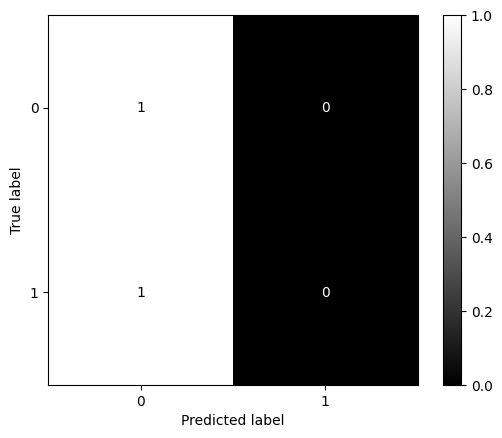

In [32]:
fig = plt.figure(figsize=(11,11))
cm = confusion_matrix(test_set.classes, np.round(predict))
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot(cmap='gray')
plt.show()